In [99]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('https://www.quandl.com/api/v3/datasets/USTREASURY/YIELD.csv?api_key=1qqA2P4yyiY5bPaauktM',
                    index_col='Date')

df.index = pd.to_datetime(df.index)
df.drop('2 MO',axis = 1,inplace =True)
df = df.loc[df.index > '2006-01-01'].dropna()


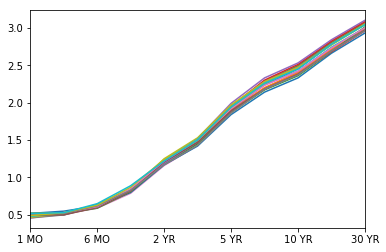

In [139]:
df.loc[(df.index > '2017-01-01') & (df.index < '2017-02-01')].T.plot(legend=False);

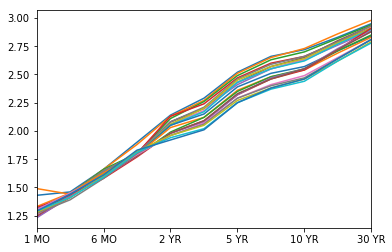

In [140]:
df.loc[(df.index > '2018-01-01') & (df.index < '2018-02-01')].T.plot(legend=False);

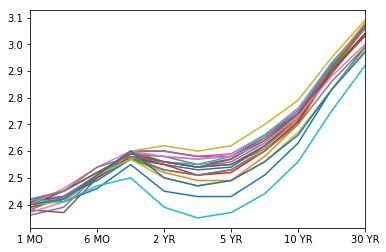

In [141]:
df.loc[(df.index > '2019-01-01') & (df.index < '2019-02-01')].T.plot(legend=False);

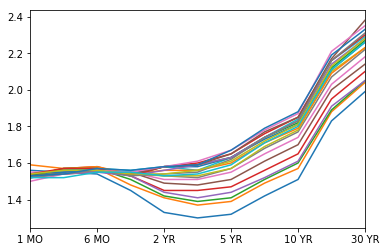

In [142]:
df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')].T.plot(legend=False);

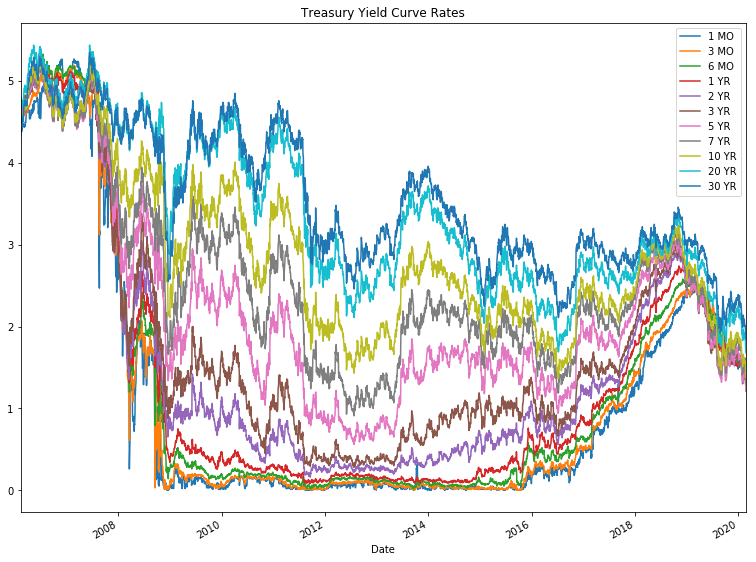

In [100]:
df.plot(title = 'Treasury Yield Curve Rates',figsize =(13,10))

plt.show()

In [101]:
df.corr()

,1 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
1 MO,1.000,0.998,0.994,0.988,0.973,0.951,0.887,0.809,0.713,0.545,0.485
3 MO,0.998,1.000,0.998,0.994,0.980,0.959,0.896,0.818,0.721,0.552,0.490
6 MO,0.994,0.998,1.000,0.998,0.987,0.968,0.907,0.830,0.734,0.563,0.499
1 YR,0.988,0.994,0.998,1.000,0.994,0.977,0.919,0.843,0.745,0.573,0.506
2 YR,0.973,0.980,0.987,0.994,1.000,0.994,0.950,0.883,0.787,0.616,0.548
3 YR,0.951,0.959,0.968,0.977,0.994,1.000,0.977,0.923,0.836,0.673,0.606
5 YR,0.887,0.896,0.907,0.919,0.950,0.977,1.000,0.983,0.927,0.799,0.742
7 YR,0.809,0.818,0.830,0.843,0.883,0.923,0.983,1.000,0.977,0.888,0.844
10 YR,0.713,0.721,0.734,0.745,0.787,0.836,0.927,0.977,1.000,0.963,0.935
20 YR,0.545,0.552,0.563,0.573,0.616,0.673,0.799,0.888,0.963,1.000,0.989


In [102]:
covariance = np.cov(df, rowvar = False)
pd.DataFrame(covariance)

,0,1,2,3,4,5,6,7,8,9,10
0,2.495,2.512,2.528,2.429,2.177,1.975,1.614,1.331,1.096,0.834,0.648
1,2.512,2.539,2.561,2.465,2.213,2.010,1.645,1.358,1.119,0.851,0.661
2,2.528,2.561,2.594,2.503,2.254,2.050,1.683,1.392,1.150,0.878,0.680
3,2.429,2.465,2.503,2.423,2.192,2.000,1.648,1.366,1.130,0.863,0.667
4,2.177,2.213,2.254,2.192,2.008,1.852,1.551,1.303,1.086,0.845,0.657
5,1.975,2.010,2.050,2.000,1.852,1.729,1.479,1.264,1.070,0.857,0.674
6,1.614,1.645,1.683,1.648,1.551,1.479,1.328,1.180,1.040,0.891,0.724
7,1.331,1.358,1.392,1.366,1.303,1.264,1.180,1.085,0.991,0.896,0.744
8,1.096,1.119,1.150,1.130,1.086,1.070,1.040,0.991,0.948,0.908,0.770
9,0.834,0.851,0.878,0.863,0.845,0.857,0.891,0.896,0.908,0.937,0.810


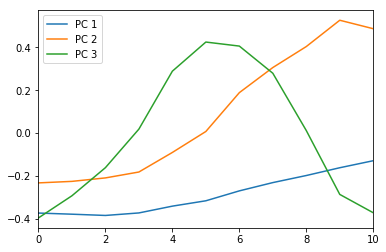

In [103]:
eigen_values, eigen_vectors= np.linalg.eig(covariance)
pd.DataFrame(eigen_vectors[:,0:3],columns =['PC 1','PC 2','PC 3']).plot();

In [111]:
pd.DataFrame(eigen_vectors)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.374,-0.233,-0.397,0.551,0.233,-0.352,-0.398,0.056,-0.031,0.051,-0.023
1,-0.380,-0.226,-0.294,0.168,-0.113,0.213,0.673,-0.325,0.109,-0.246,0.028
2,-0.386,-0.210,-0.162,-0.263,-0.370,0.239,0.007,0.440,-0.300,0.472,-0.109
3,-0.374,-0.182,0.018,-0.465,-0.137,0.060,-0.445,-0.065,0.333,-0.430,0.299
4,-0.342,-0.091,0.289,-0.310,0.405,-0.128,0.015,-0.345,0.068,0.218,-0.586
5,-0.317,0.007,0.425,-0.012,0.356,-0.210,0.268,0.161,-0.230,0.111,0.620
6,-0.271,0.189,0.406,0.284,-0.133,0.093,-0.010,0.362,-0.212,-0.549,-0.376
7,-0.232,0.306,0.279,0.354,-0.210,0.206,-0.059,-0.009,0.629,0.397,0.073
8,-0.199,0.404,0.011,0.059,-0.293,0.049,-0.239,-0.604,-0.512,0.070,0.130
9,-0.162,0.527,-0.287,-0.255,-0.190,-0.630,0.233,0.168,0.159,-0.045,-0.079


In [104]:
eigen_values_rel = eigen_values/eigen_values.sum()

df_eigen = pd.DataFrame(eigen_values_rel.T,index = ['PC '+str(i+1) for i in range(len(eigen_values))])

df_eigen['accum'] = df_eigen[0].cumsum()
df_eigen

,0,accum
PC 1,0.898,0.898
PC 2,0.091,0.989
PC 3,0.009,0.998
PC 4,0.001,0.999
PC 5,0.000,0.999
PC 6,0.000,1.000
PC 7,0.000,1.000
PC 8,0.000,1.000
PC 9,0.000,1.000
PC 10,0.000,1.000


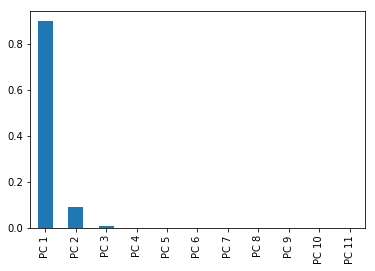

In [106]:
df_eigen[0].plot(kind ='bar');

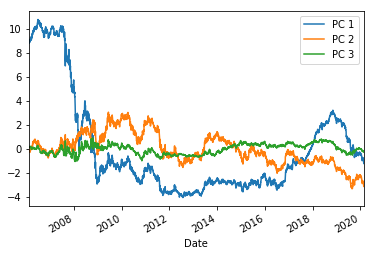

In [112]:
means = np.array(df.mean(axis = 0))

X = df.sub(means)

Y = np.dot(X , eigen_vectors)
Y2 = Y.copy()
Y2[:,0] = -1*Y2[:,0]
PCS = pd.DataFrame(Y2[:,:3],index = df.index,columns=['PC 1','PC 2','PC 3'])
PCS.plot()
plt.show()

In [124]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(np.cov(Y,rowvar=False))

,0,1,2,3,4,5,6,7,8,9,10
0,16.891,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000
1,0.000,1.705,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
2,0.000,-0.000,0.164,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
3,-0.000,-0.000,-0.000,0.025,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000
4,0.000,-0.000,-0.000,0.000,0.006,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
5,0.000,-0.000,0.000,0.000,-0.000,0.005,0.000,-0.000,-0.000,-0.000,0.000
6,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.002,-0.000,0.000,-0.000,0.000
7,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.001,-0.000,0.000,0.000
8,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.001,0.000,0.000
9,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000


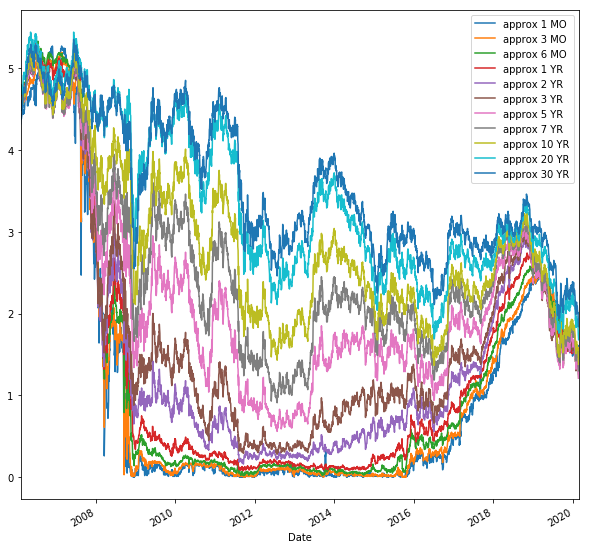

In [121]:
Y_reduced = Y[:,:]

A_reduced = eigen_vectors[:,:]

A_reduced_transposed = A_reduced.transpose()

X1 = np.dot(Y_reduced, A_reduced_transposed)

dy = X1 + means
names =['approx '+i for i in df.columns]
estim = pd.DataFrame(dy,index = df.index,columns= names)
estim.plot(figsize=(10,10))

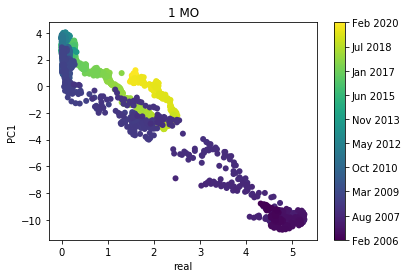

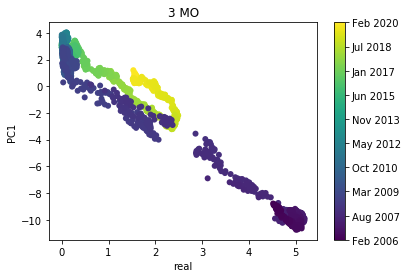

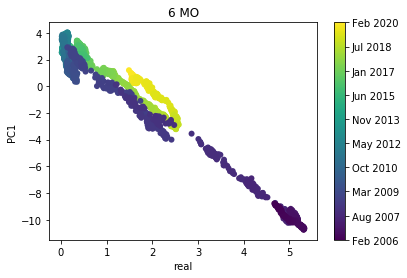

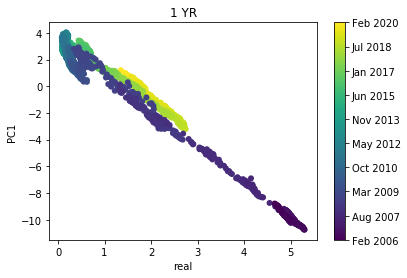

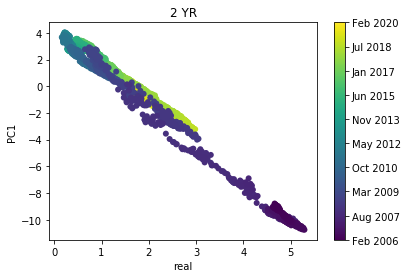

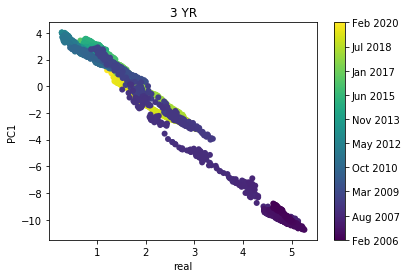

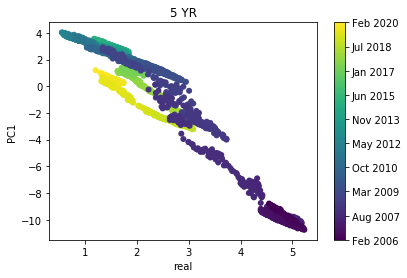

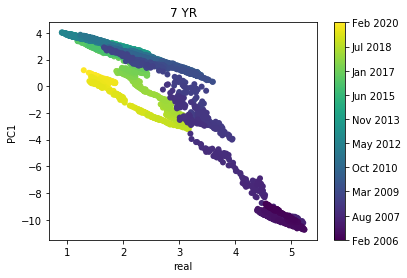

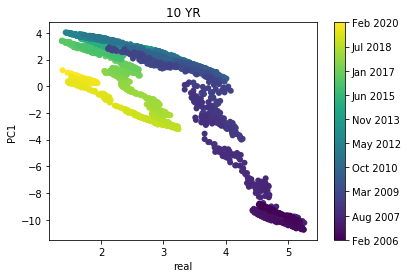

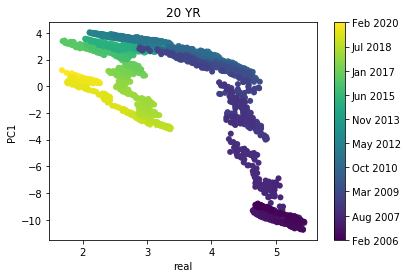

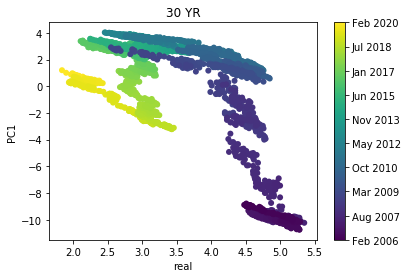

In [126]:
N_TICKS = 10
for i in range(len(df.columns)):
    fig, ax = plt.subplots()
    sc = plt.scatter(df.iloc[:,i],Y2[:,0],c = df.index,
                  edgecolors='none', marker='o')
    plt.title(df.columns[i])
    plt.xlabel('real')
    plt.ylabel('PC1')
    indexes = [df.index[i] for i in np.linspace(0,df.shape[0]-1,N_TICKS).astype(int)] 
    
    cb = fig.colorbar(sc, orientation='vertical',
                      ticks= df.loc[indexes].index.astype(int))

    cb.ax.set_yticklabels([index.strftime('%b %Y') for index in indexes])

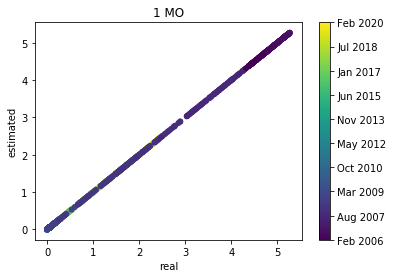

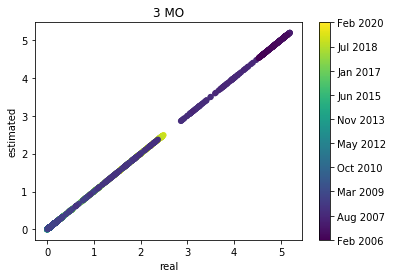

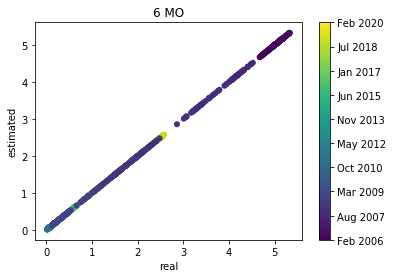

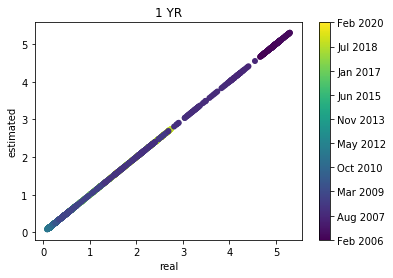

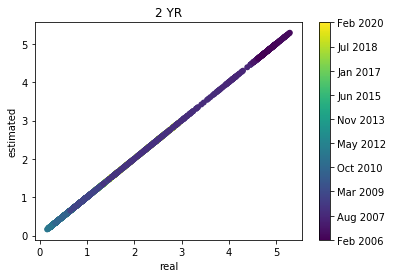

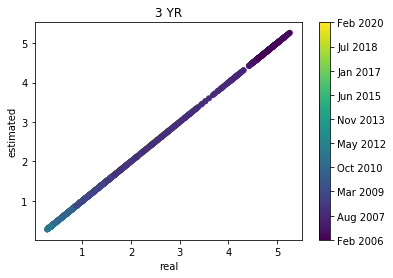

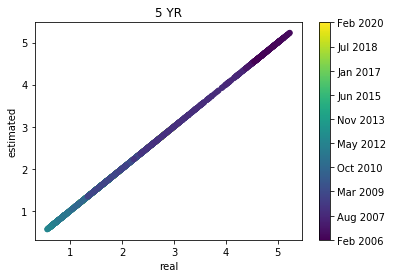

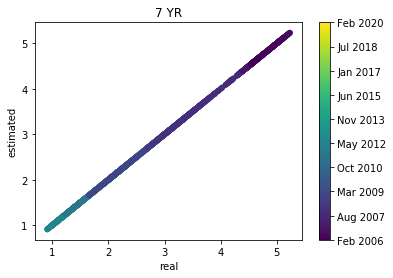

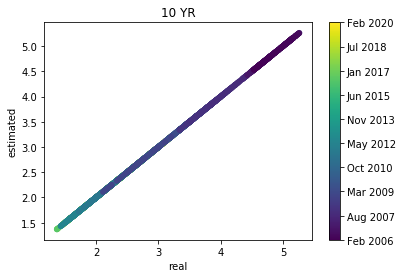

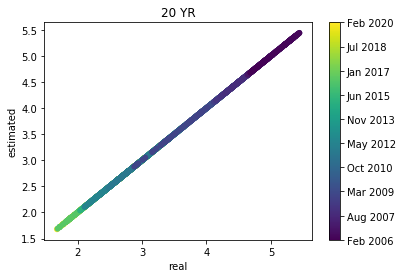

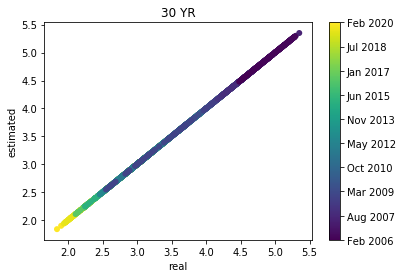

In [123]:
N_TICKS = 10
for i in range(len(df.columns)):
    fig, ax = plt.subplots()
    sc = plt.scatter(df.iloc[:,i],estim.iloc[:,i],c = df.index,
                  edgecolors='none', marker='o')
    
    indexes = [df.index[i] for i in np.linspace(0,df.shape[0]-1,N_TICKS).astype(int)] 
    plt.title(df.columns[i])
    plt.xlabel('real')
    plt.ylabel('estimated')
    cb = fig.colorbar(sc, orientation='vertical',
                      ticks= df.loc[indexes].index.astype(int))

    cb.ax.set_yticklabels([index.strftime('%b %Y') for index in indexes])

In [94]:
indexes 

[Timestamp('2020-02-24 00:00:00'),
 Timestamp('2019-09-06 00:00:00'),
 Timestamp('2019-03-25 00:00:00'),
 Timestamp('2018-10-03 00:00:00'),
 Timestamp('2018-04-20 00:00:00'),
 Timestamp('2017-11-02 00:00:00'),
 Timestamp('2017-05-19 00:00:00'),
 Timestamp('2016-12-02 00:00:00'),
 Timestamp('2016-06-17 00:00:00'),
 Timestamp('2016-01-04 00:00:00')]